In [1]:
# Use distance over median over MAD to calculate z-score and identify outliers

# https://stats.stackexchange.com/questions/56402/detecting-outliers-in-count-data

# https://lirias.kuleuven.be/bitstream/123456789/286471/1/finaleversiephdvanderveekenstephan.P
    

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date
from isoweek import Week

import os
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "IMAM.settings")

from django.conf import settings

import django
django.setup()

from home.models import Site, Stock, Program

In [2]:
# Import the program data entry model

program = Program.objects.all()

In [ ]:
# Double MAD with, say, a cutoff of 3:

# DoubleMAD <- function(x, zero.mad.action="warn"){
#    # The zero.mad.action determines the action in the event of an MAD of zero.
#    # Possible values: "stop", "warn", "na" and "warn and na".
#    x         <- x[!is.na(x)]
#    m         <- median(x)
#    abs.dev   <- abs(x - m)
#    left.mad  <- median(abs.dev[x<=m])
#    right.mad <- median(abs.dev[x>=m])
#    if (left.mad == 0 || right.mad == 0){
#       if (zero.mad.action == "stop") stop("MAD is 0")
#       if (zero.mad.action %in% c("warn", "warn and na")) warning("MAD is 0")
#       if (zero.mad.action %in% c(  "na", "warn and na")){
#          if (left.mad  == 0) left.mad  <- NA
#          if (right.mad == 0) right.mad <- NA
#       }
#    }
#    return(c(left.mad, right.mad))

In [22]:
# to use MAD with non-symetrical distributions - use Double MAD

def double_mad(var): 
    median = var.median()
    left_mad = median(abs.dev[x<=m])
    right_mad = median(abs.dev[x>m])
    
    if left_med==0 | right_med==0:
        print "Stop - MAD is 0"
    
    return outlier
    return median

double_mad(amar)

NameError: name 'amar' is not defined

In [3]:
from django.db.models import Avg
program.aggregate(Avg('amar'))

{'amar__avg': 11.921865430046374}

In [8]:
# pip install django-postgres-stats

# add to INSTALLED_APPS
#     'postgres_stats', 

from django.contrib.postgres.fields import ArrayField

results = program.aggregate(med = Percentile('amar',0.5, output_field=models.FloatField()))
# Percentile is not defined

print results['median']


NameError: name 'Percentile' is not defined

In [37]:
# assert results['median'] == 0

SyntaxError: invalid syntax (<ipython-input-37-7a08cb994935>, line 3)

In [21]:
counter = 0

for weekly_report in program:
    counter += 1
    if weekly_report.amar > 1000:
        print counter, "Excess admissions", weekly_report.siteid,\
            weekly_report.weeknum,\
            weekly_report.year,\
            weekly_report.amar
    elif weekly_report.amar <=1000:
        pass
    else:
        print counter, "                  ERROR", weekly_report.siteid

print counter

6335 Excess admissions 1717110005 19 2017 1853
31390 Excess admissions 512110003 45 2016 1450
34287


In [ ]:
# How to access sitename in Site through the Program model. 

# Use foreign key in Django
# Load into dictionary or list comprehension 

In [32]:
# Import data from Pandas
# df = pd.read_excel("C:\TEMP\pro.xlsx", sheetname='Runs')
df = pd.read_excel("/home/robert/Downloads/pro.xlsx", sheetname='Runs')

In [33]:
df.head()

,Contact UUID,URN,Name,Groups,SiteID,First Seen,Last Seen,WeekNum (Category) - IMAM Program,WeekNum (Value) - IMAM Program,WeekNum (Text) - IMAM Program,...,Dcur_i (Text) - IMAM Program,Tout_o (Category) - IMAM Program,Tout_o (Value) - IMAM Program,Tout_o (Text) - IMAM Program,Confirm (Category) - IMAM Program,Confirm (Value) - IMAM Program,Confirm (Text) - IMAM Program,Msg Routing (Category) - IMAM Program,Msg Routing (Value) - IMAM Program,Msg Routing (Text) - IMAM Program
0,00771990-6cda-4987-b329-90eda5b43683,2348067418765,Oladapo Osunkentan,"MNP EOP, MNP Low stock, MNP MiSL, MNP stock no...",443100048,2016-10-06 17:00:25,2016-10-06 17:01:37,1 - 52,42,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bc8417eb-77b5-485f-98c8-b4fde4f00f7e,2348032898392,Muhammad Ali Hamza.,"Imam Supervision, Imam Supervision 2, Imam Sup...",33,2016-06-29 12:26:42,2016-06-29 12:28:10,1 - 52,26,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,343bd73a-ac74-4835-b2e5-13590d61d335,2348081798563,Muhammad Ibrahim.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3313,2016-06-28 13:12:56,2016-06-28 13:15:33,1 - 52,26,26,...,NaN,0 - 9999,0,0,Yes,Yes,Yes,Site,Site,Yes
3,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-06-28 13:09:28,2016-06-28 13:19:16,1 - 52,23,23,...,NaN,0 - 9999,0,0,Yes,Yes,Yes,Site,Site,Yes
4,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 09:20:25,2016-07-10 09:33:28,1 - 52,22,22,...,NaN,0 - 9999,0,0,Yes,Y,Y,Site,Site,Y


In [34]:
df.rename(columns = {'Confirm (Category) - IMAM Program':'confirm'}, inplace = True)
df.confirm.unique()

array([nan, u'Yes', u'No', u'Other', u'X'], dtype=object)

In [35]:
# drop all unconfirmed data
# df.confirm = df["Confirm (Category) - IMAM Program"] 
#                Confirm (Category) - IMAM Program  

df = df[df.confirm == 'Yes']

# EXAMPLES
# df[df['coverage'] > 50]
# df_filtered = df.query('salary>30000')
# df[df["Country"] == 'US']
# df_filtered = df[(df.salary >= 30000) & (df.year == 2017)]

In [36]:
# rename vars
df.rename(columns = {'SiteID':'siteid'}, inplace = True)
df.rename(columns = {'Beg_o (Value) - IMAM Program':'beg'}, inplace = True)
df.rename(columns = {'Amar_o (Value) - IMAM Program':'amar'}, inplace = True)

In [37]:
# df = df.drop(['SiteID', 'Last Seen', 'WeekNum (Value) - IMAM Program ', 'Amar_o (Value) - IMAM Program'], axis=1)
# how to drop several columns ?

# Include only a small number of vars. 
df =  df[['siteid','amar','beg']]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32113 entries, 2 to 40086
Data columns (total 3 columns):
siteid    32105 non-null object
amar      29473 non-null object
beg       29473 non-null object
dtypes: object(3)
memory usage: 1003.5+ KB


In [9]:
# remove rows from 2016 ? 

# import isocalendar
# datetime.date(2010, 6, 16).isocalendar()[1]

# extract year from last seen
import datetime
# year = df["Last Seen"].datetime.date
# iterate over rows
year = datetime.datetime.df["Last Seen"].isocalendar()[0]
print year

# one method to make a univariate list of counts of variable outcomes
# iterate over rows
def create_year():
    for row in df["Last Seen":
        # Last Seen not formatted as Datetime
        df.year = df["Last Seen"].datetime.isocalendar()[0]
    return df.year

# Take 1st 4 chars from date to = year
# df.year = df.["Last Seen"][0:3]

SyntaxError: invalid syntax (<ipython-input-9-06070bf1f385>, line 17)

In [39]:
# Data cleaning
# change string to integer
df.amar = pd.to_numeric(df.amar, errors='force', downcast='integer')
df.beg = pd.to_numeric(df.beg, errors='force', downcast='integer')
# Remove all Nan
df = df.query('amar == amar')
df = df.query('beg == beg')

(array([  1.38900000e+04,   5.98300000e+03,   3.52600000e+03,
          2.13600000e+03,   1.37200000e+03,   6.95000000e+02,
          4.55000000e+02,   3.26000000e+02,   2.66000000e+02,
          1.39000000e+02,   1.19000000e+02,   1.01000000e+02,
          9.10000000e+01,   6.20000000e+01,   3.50000000e+01,
          3.90000000e+01,   3.60000000e+01,   3.50000000e+01,
          2.20000000e+01,   2.10000000e+01,   1.40000000e+01,
          1.10000000e+01,   5.00000000e+00,   9.00000000e+00,
          8.00000000e+00,   9.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   5.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          1.00000000e+00]),
 array([   0.  ,    6.25,   12.5 ,   18.75,   25.  ,   31.25,   37.5 ,
          43.75,   50.  ,   56.25,   62.5 ,   68.75,   75.  ,   81.25,
          87.5 ,   93.75

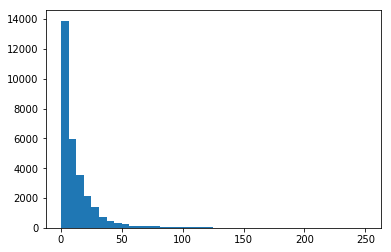

In [40]:
# Histogram of Amar
# plt.hist(df.amar, bins = 40, range = (df.amar.min(),df.amar.max()))
# amar ranges from 0 to 2500
plt.hist(df.amar, bins = 40, range = (0,250))

In [65]:
print df.amar.quantile([0.25,0.75])
# Quantiles of each object.

0.25     2.0
0.75    16.0
Name: amar, dtype: float64


In [44]:
# To account for skewed distributions, make a different calculation of MAD for left and right side of distribution

# https://lirias.kuleuven.be/bitstream/123456789/286471/1/finaleversiephdvanderveekenstephan.P

# adjusted outlyingness

df['med'] = df.amar.median()

# Median absolute deviation

# The constant b = 1.483 is a correction factor which makes the MAD unbiased at the normal distribution.

# df['left_mad'] = np.where(df.amar <= df.med, abs(df.amar - df.amar.median()).median() * 1.483, None)
df['right_mad'] = np.where(df.amar > df.med, abs(df.amar - df.amar.median()).median() * 1.483, None)

df['out'] = 99
df['out'] = np.where(df.amar <= 6, (df.amar - df.med) / 2.0, df.out)
df['out'] = np.where(df.amar > 6, (df.amar - df.med) / df.right_mad, df.out)

df

,siteid,amar,beg,med,left_mad,out,right_mad
2,3313,10.0,89.0,7.0,None,0.337154,8.898
3,3308110010,8.0,66.0,7.0,None,0.112385,8.898
4,3308110010,13.0,67.0,7.0,None,0.674309,8.898
5,3308110010,8.0,66.0,7.0,None,0.112385,8.898
6,3308110010,14.0,64.0,7.0,None,0.786694,8.898
8,3308110010,13.0,75.0,7.0,None,0.674309,8.898
9,3308110010,17.0,64.0,7.0,None,1.12385,8.898
10,3308110010,8.0,66.0,7.0,None,0.112385,8.898
11,3308110010,14.0,64.0,7.0,None,0.786694,8.898
12,3308110010,13.0,75.0,7.0,None,0.674309,8.898


(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.47000000e+03,   5.65800000e+03,   6.80900000e+03,
          7.09900000e+03,   1.77600000e+03,   7.01000000e+02,
          2.93000000e+02,   1.85000000e+02,   8.50000000e+01,
          7.20000000e+01,   3.70000000e+01,   1.80000000e+01,
          2.10000000e+01,   6.00000000e+00,   9.00000000e+00,
          7.00000000e+00,   5.00000000e+00]),
 array([-10.  ,  -8.25,  -6.5 ,  -4.75,  -3.  ,  -1.25,   0.5 ,   2.25,
          4.  ,   5.75,   7.5 ,   9.25,  11.  ,  12.75,  14.5 ,  16.25,
         18.  ,  19.75,  21.5 ,  23.25,  25.  ]),
 <a list of 20 Patch objects>)

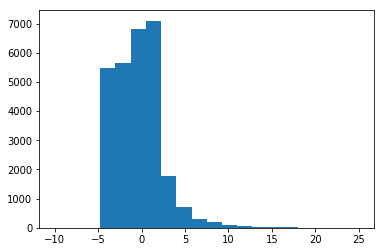

In [51]:
# Histogram of out
# plt.hist(df.out, bins = 100, range = (df.out.min(),df.out.max()))

plt.hist(df.out, bins = 20, range = (-10,25))

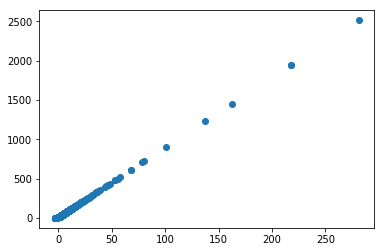

In [48]:
plt.scatter(df.out, df.amar)
plt.show()

In [56]:
df = df.sort_values(by='amar', ascending=True)
df

,siteid,amar,beg,med,left_mad,out,right_mad
19363,208110021,0.0,23.0,7.0,8.898,-3.5,None
34266,2106110007,0.0,52.0,7.0,8.898,-3.5,None
34256,2106110007,0.0,0.0,7.0,8.898,-3.5,None
34251,2104110004,0.0,7.0,7.0,8.898,-3.5,None
34244,2104110004,0.0,3.0,7.0,8.898,-3.5,None
34243,2104110004,0.0,3.0,7.0,8.898,-3.5,None
34242,2104110004,0.0,4.0,7.0,8.898,-3.5,None
34182,2106110011,0.0,35.0,7.0,8.898,-3.5,None
34174,2106110011,0.0,88.0,7.0,8.898,-3.5,None
34332,2104110001,0.0,37.0,7.0,8.898,-3.5,None


In [59]:
df_out = df.query('out > 10')
df_out

# 724 errors identified with left_mad = 8.9 and out > 6
# + 6 out  = amar 61
# print 724./ 40000


,siteid,amar,beg,med,left_mad,out,right_mad
5200,512110020,96.0,96.0,7.0,None,10.0022,8.898
6998,1703110030,96.0,1429.0,7.0,None,10.0022,8.898
6997,1703110030,96.0,1429.0,7.0,None,10.0022,8.898
23649,2001110004,96.0,320.0,7.0,None,10.0022,8.898
28835,3609110022,96.0,436.0,7.0,None,10.0022,8.898
27979,2011120017,97.0,35.0,7.0,None,10.1146,8.898
22485,2001110059,97.0,741.0,7.0,None,10.1146,8.898
7842,1716110015,97.0,729.0,7.0,None,10.1146,8.898
5174,512110020,97.0,97.0,7.0,None,10.1146,8.898
7463,1714110033,97.0,438.0,7.0,None,10.1146,8.898


In [79]:
# if the input variable follows a poisson distribution, identify outliers with the calculation

# transform data first
# y =  2 * sqrt x

# Outliers are all values > y + 3
df['amar_tr'] = 2. * (df.amar ** 0.5)

# Amar of 10 or more is considered an outlier.  This test is not robust for amar data

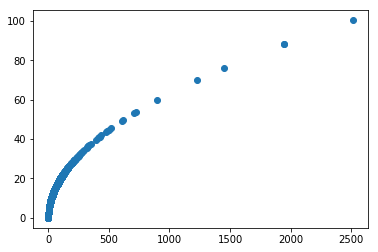

In [89]:
plt.scatter(df.amar, df.amar_tr)
plt.show()

In [84]:
df = df.sort_values(by='amar', ascending=True)

,siteid,amar,beg,mad_z,amar_tr
19363,208110021,0.0,23.0,-3,0.000000
34266,2106110007,0.0,52.0,-3,0.000000
34256,2106110007,0.0,0.0,-3,0.000000
34251,2104110004,0.0,7.0,-3,0.000000
34244,2104110004,0.0,3.0,-3,0.000000
34243,2104110004,0.0,3.0,-3,0.000000
34242,2104110004,0.0,4.0,-3,0.000000
34182,2106110011,0.0,35.0,-3,0.000000
34174,2106110011,0.0,88.0,-3,0.000000
34332,2104110001,0.0,37.0,-3,0.000000


In [88]:
df_x = df.query('amar_tr > 6')
df_x
# Amar of 10 or more is considered an outlier.  This test is not robust. 

,siteid,amar,beg,mad_z,amar_tr
14823,3510110006,10.0,37.0,0.571429,6.324555
11700,3509110021,10.0,48.0,0.571429,6.324555
11694,3509110021,10.0,48.0,0.571429,6.324555
14852,3510110007,10.0,89.0,0.571429,6.324555
14577,3506110016,10.0,1155.0,0.571429,6.324555
791,3313110029,10.0,149.0,0.571429,6.324555
14860,3510110007,10.0,60.0,0.571429,6.324555
5159,504110020,10.0,89.0,0.571429,6.324555
33373,2103110019,10.0,51.0,0.571429,6.324555
6070,1704110019,10.0,74.0,0.571429,6.324555


In [73]:
df['median_amar'] = df.amar.median()
# how to use simple python vars instead of col vars
# just calculate everything at once
df.median_amar

7.0

In [28]:
# Median absolute deviation
from statsmodels.robust.scale import mad
# constant = 1
# The constant b = 1.483 is a correction factor which makes the MAD unbiased at the normal distribution.
df['mad_amar'] = mad(df.amar, c=1)

df.mad_amar.unique()

ImportError: No module named statsmodels.robust.scale

In [85]:
# Median of the differences of absolute value of (median - value)
mad_amar2 =(abs(df.amar - df.amar.median())).median()
mad_amar2

6.0

In [22]:
# Consistency constant and outlier cut-off

# if the distribution of observations is normal, we can use 1.4826 as a normalization factor
# with the  normalization factor, we can interpret the results as Z-scores

# if the distribution is not normal
# use 1 / median. 75 Percentile

# 1 divided by value of 75th percentile of amar
print 1. / 16

0.0625


In [23]:
# reciprocal of 2 to sqrt(3)
print 1 / (2 / 3 ** 0.5)

0.866025403784


In [116]:
consistency_constant = 1 / (2 / 3 ** 0.5)
df['mad_amar2'] = mad(df.amar, c=consistency_constant)

mad_amar2 = 6.92
print "-3 SD = %s +3 SD is %s" % (6 - mad_amar2 * 3, 6 + mad_amar2 * 3)
# this is not appropriate as the distribution is not normal

-3 SD = -14.76 +3 SD is 26.76


In [110]:
print df.amar.mean()
print df.amar.std()

12.8436362512
31.0570323431


In [120]:
# to use MAD with non-symetrical distributions - use Double MAD

def double_mad(var): 
    df = df.query('var == var')
    median = df.var.median()
    left_med = median(abs.dev[x<=m])
    right_med = median(abs.dev[x>m])
    
    if left_med==0 | right_med==0:
        break
    
    return median

print double_mad()

# Double MAD with, say, a cutoff of 3:
# DoubleMAD <- function(x, zero.mad.action="warn"){
#    # The zero.mad.action determines the action in the event of an MAD of zero.
#    # Possible values: "stop", "warn", "na" and "warn and na".
#    x         <- x[!is.na(x)]
#    m         <- median(x)
#    abs.dev   <- abs(x - m)
#    left.mad  <- median(abs.dev[x<=m])
#    right.mad <- median(abs.dev[x>=m])
#    if (left.mad == 0 || right.mad == 0){
#       if (zero.mad.action == "stop") stop("MAD is 0")
#       if (zero.mad.action %in% c("warn", "warn and na")) warning("MAD is 0")
#       if (zero.mad.action %in% c(  "na", "warn and na")){
#          if (left.mad  == 0) left.mad  <- NA
#          if (right.mad == 0) right.mad <- NA
#       }
#    }
#    return(c(left.mad, right.mad))

UnboundLocalError: local variable 'df' referenced before assignment

In [102]:
# x = remove Nan
df['median'] = df.amar.median()

# np.where

# filter entire dataset
left = df.loc[(df["amar"] <= df["median"])]
right = df.loc[(df["amar"] > df["median"])]

left['left_mad'] = abs(left.amar - left.amar.median()).median() * 1.483 
right['right_mad'] = abs(right.amar - right.amar.median()).median() * 1.483 

left['left_out'] = left.amar / left.left_mad
right['right_out'] = right.amar / right.right_mad

# left = 2
# right = 6
right



/home/robert/PycharmProjects/IMAM/ve/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/robert/PycharmProjects/IMAM/ve/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/robert/PycharmProjects/IMAM/ve/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,siteid,amar,beg,mad_z,amar_tr,median,right_mad,right_out
15721,3507110016,8.0,141.0,0.285714,5.656854,7.0,8.898,0.899078
7828,1716110009,8.0,37.0,0.285714,5.656854,7.0,8.898,0.899078
15826,3505110040,8.0,29.0,0.285714,5.656854,7.0,8.898,0.899078
16293,807210007,8.0,24.0,0.285714,5.656854,7.0,8.898,0.899078
884,3313110007,8.0,84.0,0.285714,5.656854,7.0,8.898,0.899078
32472,2108110003,8.0,75.0,0.285714,5.656854,7.0,8.898,0.899078
32467,2108110003,8.0,75.0,0.285714,5.656854,7.0,8.898,0.899078
38974,207140015,8.0,14.0,0.285714,5.656854,7.0,8.898,0.899078
15745,3507110016,8.0,70.0,0.285714,5.656854,7.0,8.898,0.899078
1760,3305110027,8.0,149.0,0.285714,5.656854,7.0,8.898,0.899078


In [ ]:
df.z_amar = (df.amar - df.amar.median()) / (abs(df.amar - df.amar.median())).median()

# these are individual values
print df.z_amar
print mad_amar

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.14800000e+03,
          6.72200000e+03,   3.08400000e+03,   1.36200000e+03,
          7.25000000e+02,   4.34000000e+02,   2.38000000e+02,
          1.81000000e+02,   1.17000000e+02,   8.40000000e+01,
          5.40000000e+01,   4.70000000e+01,   4.20000000e+01,
          3.60000000e+01,   2.00000000e+01,   1.00000000e+01,
          9.00000000e+00,   1.20000000e+01,   9.00000000e+00,
          5.00000000e+00]),
 array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
         -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.

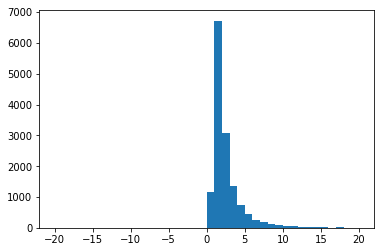

In [104]:
# df.boxplot(column='z_amar')
plt.hist(right.right_out, bins = 40, range = (-20,20))

# There are  + and - values

In [ ]:
# BEG Number of cases under treatment
plt.hist(df.beg, bins = 40, range = (df.beg.min(),1999))

# There are serious errors in beg
# Needs greater analysis

In [ ]:
print df.beg.quantile([0.25,0.75])
# Quantiles of each object.

In [138]:
print -1.3 / 3

-0.433333333333


In [ ]:
# %quickref
# help
help(datetime)

In [ ]:
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print pd.value_counts(data["LoanAmount_Bin"], sort=False)